In [110]:
# Customer Churn Analysis for a Subscription Business

# Goal: Identify Customers likely to churn and understand key churn factors
# Business Questions:
# Who are the customers likely to churn?
# What are the key influencers of churn?
# What actions can reduce churn?

In [112]:
# Load Data

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Telco-Customer-Churn.csv')

In [113]:
# Handle Missing Values

df.isnull().sum()
df = df.dropna()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [114]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [116]:
df['Churn_Yes'] = df['Churn'].map({'Yes':1, 'No':0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [118]:
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72],
                           labels=['0-12','12-24','24-48','48-60','60-72'])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Yes,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,24-48
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,24-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,12-24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,60-72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,0-12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,0-12


In [120]:
df.drop(columns=['customerID'], inplace=True)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Yes,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,24-48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,24-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-12


In [92]:
# Exploratory Data Analysis

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme
sns.set(style='whitegrid')

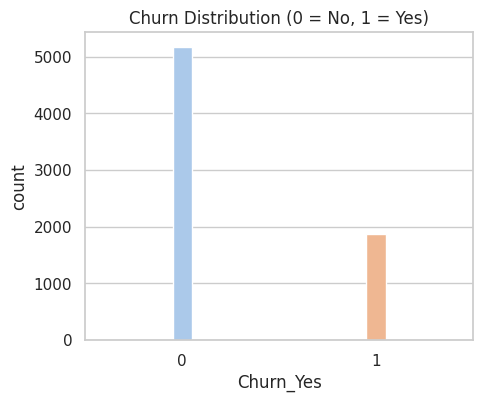

In [124]:
# Churn Distribution

plt.figure(figsize=(5,4))
sns.countplot(x='Churn_Yes', data=df, palette='pastel', width=0.1)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()

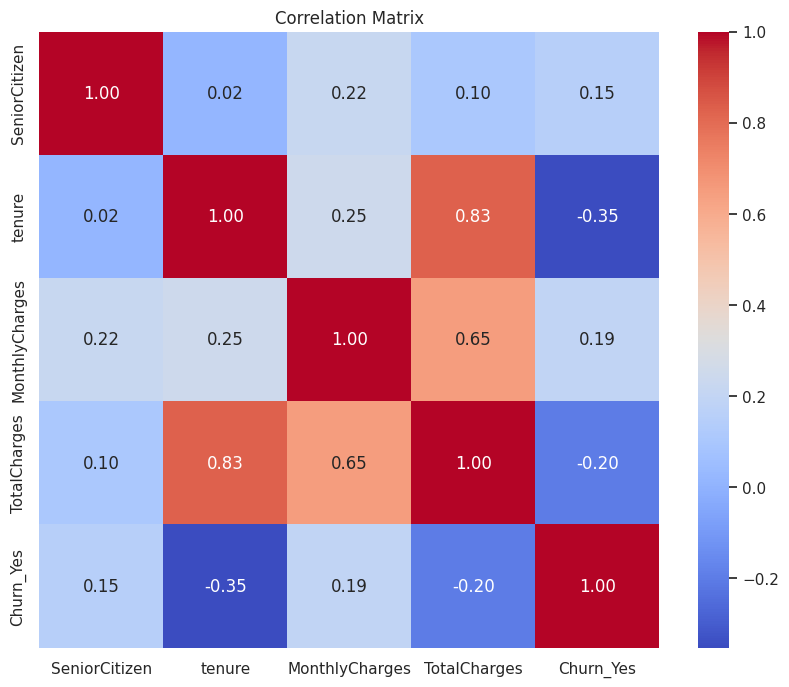

In [125]:
# 2. Correlation Matrix (numerical features)

plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

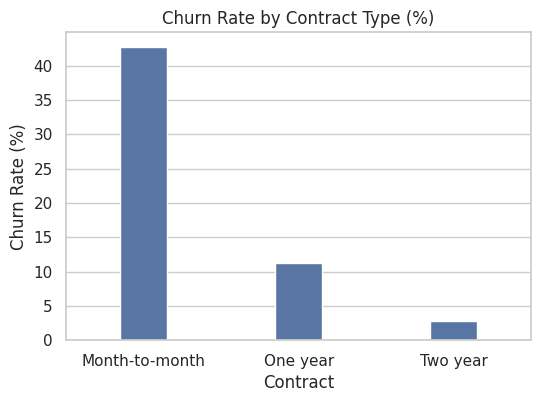

In [128]:
# 3. Churn by Contract Type

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Contract', y='Churn_Yes', width=0.3, estimator=lambda x: sum(x) / len(x) * 100, ci=None)
plt.title("Churn Rate by Contract Type (%)")
plt.ylabel("Churn Rate (%)")
plt.show()

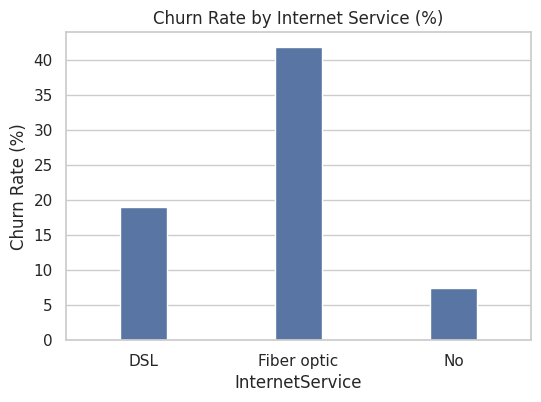

In [129]:
# 4. Churn by Internet Service

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='InternetService', y='Churn_Yes', width=0.3, estimator=lambda x: sum(x) / len(x) * 100, ci=None)
plt.title("Churn Rate by Internet Service (%)")
plt.ylabel("Churn Rate (%)")
plt.show()

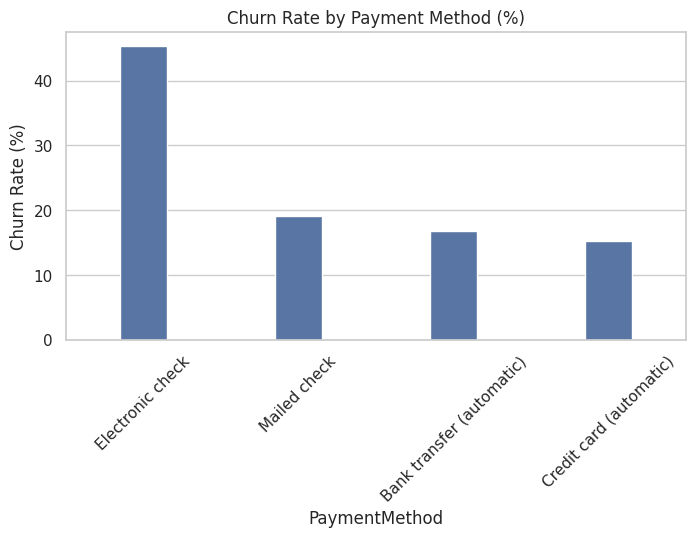

In [130]:
# 5. Churn by Payment Method

plt.figure(figsize=(8,4))
sns.barplot(data=df, x='PaymentMethod', y='Churn_Yes', width=0.3, estimator=lambda x: sum(x) / len(x) * 100, ci=None)
plt.title("Churn Rate by Payment Method (%)")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()

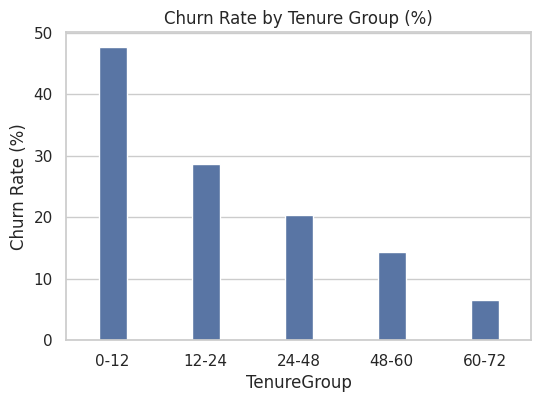

In [131]:
# 6. Churn by Tenure Group

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='TenureGroup', y='Churn_Yes', width=0.3, estimator=lambda x: sum(x) / len(x) * 100, ci=None)
plt.title("Churn Rate by Tenure Group (%)")
plt.ylabel("Churn Rate (%)")
plt.show()

In [132]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Yes,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,24-48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,24-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,12-24
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,60-72
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,0-12
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,0-12


In [133]:
# Data Modeling

In [134]:
# Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
# Prepare the data
# Drop non-predictive and target columns

X = df.drop(['Churn', 'Churn_Yes'], axis=1)

In [139]:
# Convert categorical variables to dummy/one-hot encoding

X = pd.get_dummies(X, drop_first=True)

In [140]:
# Target variable

y = df['Churn_Yes']

In [141]:
# Step 3: Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
# Train the model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [143]:
# Predictions
y_pred = model.predict(X_test)

In [144]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[949  87]
 [202 171]]


In [145]:
# Feature Importance Plot

In [146]:
# Get top 10 important features

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

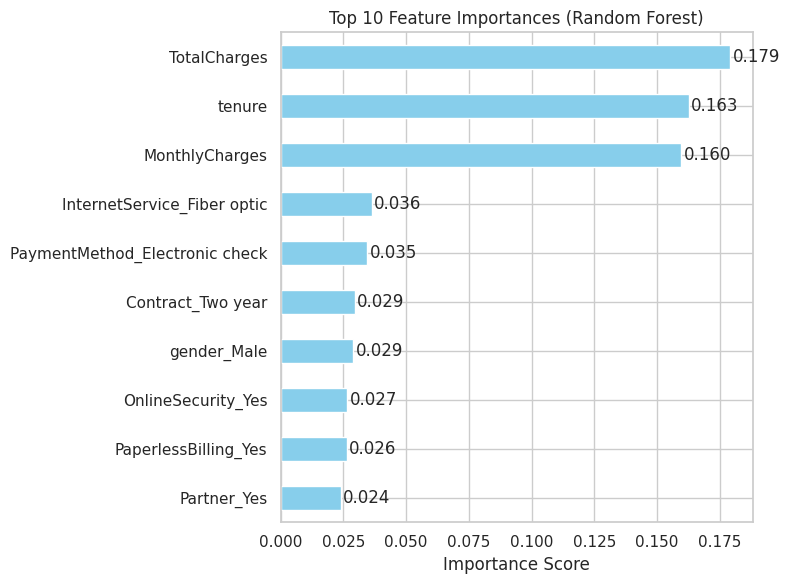

In [149]:
# Plot with labels

plt.figure(figsize=(8,6))
ax = top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()

# Add labels

for i, (value, name) in enumerate(zip(top_features, top_features.index)):
    plt.text(value + 0.001, i, f'{value:.3f}', va='center')

plt.tight_layout()
plt.show()

In [151]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize the base model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:\n", grid_search.best_params_)
print("Best Accuracy:\n", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("Tuned Model Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters:
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy:
 0.80386936457224
Tuned Model Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.87      1036
           1       0.68      0.50      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
 [[950  86]
 [186 187]]


In [152]:
# Add predictions to a copy of the test set
X_test_reset = X_test.copy()
X_test_reset['Actual_Churn'] = y_test.values
X_test_reset['Predicted_Churn'] = best_model.predict(X_test)

# Optionally, decode one-hot features for readability (optional step)
# X_test_reset = pd.concat([X_test_reset, df[['customerID']]], axis=1) if you had 'customerID'

# Export to Excel
X_test_reset.to_excel("Churn_Predictions_PowerBI.xlsx", index=False)

# End